In [1]:
import numpy as np, pandas as pd, math
import requests, csv
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# **Data Collection**

#### Reading ball by ball data

In [2]:
ipl_ball = pd.read_csv('ipl_match_ball_by_ball_data.csv')
ipl_ball.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Reading Data related to matches (only) 

In [3]:
ipl_match = pd.read_csv('ipl_match_info_data.csv')
ipl_match.head(3)

,match_id,season,date,city,venue,team1,team2,toss_winner,toss_decision,player_of_match,...,event,match_number,umpire1,umpire2,reserve_umpire,tv_umpire,match_referee,eliminator,method,date_1
0,335982,2007/08,2008-04-18,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,...,Indian Premier League,1.0,Asad Rauf,RE Koertzen,VN Kulkarni,AM Saheba,J Srinath,NaN,NaN,NaN
1,335983,2007/08,2008-04-19,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,MEK Hussey,...,Indian Premier League,2.0,MR Benson,SL Shastri,MSS Ranawat,RB Tiffin,S Venkataraghavan,NaN,NaN,NaN
2,335984,2007/08,2008-04-19,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,MF Maharoof,...,Indian Premier League,3.0,Aleem Dar,GA Pratapkumar,NaN,IL Howell,GR Viswanath,NaN,NaN,NaN


#### Obtaining actual List of Total Indian Premier League (IPL) players from wikipedia

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_Indian_Premier_League_players'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'wikitable sortable'})

rows = table.find_all('tr')[1:]

Total_IPL_players = []

for row in rows:
    cols = row.find_all('td')
    name = cols[0].text.strip()
    country = cols[4].text.strip()
    Total_IPL_players.append({'Name': name, 'Country': country})

print('\n Total IPL players ---',len(Total_IPL_players))


 Total IPL players --- 923


# **Data Preprocessing**


---




#### In IPL 2020, Teams batting first have won 75% (21) of the 28 matches, while chasing sides have won only seven games. Five of the seven wins by hasing teams were completed in the final over. This is because of climatic conditions in UAE and difference in cricket pitch. So to make data more meaningful, we removed 2020 IPL data.

In [5]:
# Formatting the Data

print('Seasons in ipl_ball df', ipl_ball['season'].unique())
# Updating seasons column to string 
counter_2020 =0 
for i in range(len(ipl_ball)):
  if ipl_ball['season'][i] == 2012 : ipl_ball['season'][i] = '2012'
  if ipl_ball['season'][i] == 2013 : ipl_ball['season'][i] = '2013'
  if ipl_ball['season'][i] == 2014 : ipl_ball['season'][i] = '2014'
  if ipl_ball['season'][i] == 2015 : ipl_ball['season'][i] = '2015'
  if ipl_ball['season'][i] == 2016 : ipl_ball['season'][i] = '2016'
  if ipl_ball['season'][i] == 2017 : ipl_ball['season'][i] = '2017'
  if ipl_ball['season'][i] == 2018 : ipl_ball['season'][i] = '2018'
  if ipl_ball['season'][i] == 2019 : ipl_ball['season'][i] = '2019'
  if ipl_ball['season'][i] == '2020/21': 
    counter_2020+=1
  if ipl_ball['season'][i] == 2021 : ipl_ball['season'][i] = '2021'
  if ipl_ball['season'][i] == 2022 : ipl_ball['season'][i] = '2022'

print('\n Seasons in ipl_ball df (before formatting)', ipl_ball['season'].unique())
print('Seasons in ipl_match df', ipl_match['season'].unique())

print('Total number of balls bowled in IPL 2020  = ',counter_2020)

match_2020 = 0 
for i in range(len(ipl_match)):
  if ipl_match['season'][i] == '2020/21': match_2020+=1
print("Total number of matches played in 2020 IPL ", match_2020)

ipl_ball1 = ipl_ball[ipl_ball.season != "2020/21"]
ipl_match1 = ipl_match[ipl_match.season != "2020/21"]


Seasons in ipl_ball df ['2007/08' '2009' '2009/10' '2011' '2012' 2012 2013 2014 2015 2016 2017
 2019 2018 '2018' '2019' '2020/21' '2021' 2021 2022]

 Seasons in ipl_ball df (before formatting) ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2020/21' '2021' '2022']
Seasons in ipl_match df ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022']
Total number of balls bowled in IPL 2020  =  14559
Total number of matches played in 2020 IPL  60


In [6]:
print('\n Total number of balls bowled in IPL  = ', len(ipl_ball))
print("\n Total number of matches played = ", len(ipl_match))
print('\n Total number of balls bowled in IPL (after formatting) = ', len(ipl_ball1))
print("\n Total number of matches played (after formatting) = ", len(ipl_match1))  
print('\n \n Seasons in ipl_ball df (after formatting)', ipl_ball1['season'].unique())
print('\n Seasons in ipl_match df', ipl_match1['season'].unique())


 Total number of balls bowled in IPL  =  225954

 Total number of matches played =  950

 Total number of balls bowled in IPL (after formatting) =  211395

 Total number of matches played (after formatting) =  890

 
 Seasons in ipl_ball df (after formatting) ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2021' '2022']

 Seasons in ipl_match df ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2021' '2022']


#### Inconsistency in Data. Many new teams came up and Few teams dissolved because of various reasons. So, many data more consistency by make them as single teams

Defunct teams -->  Deccan Chargers, Gujarat Lions, Kochi Tuskers Kerala, Pune Warriors India, Rising Pune Supergiant
1. Delhi Daredevils and Delhi Capitals  are same
2. Kings XI Punjab and Punjab Kings are same
3. Rising Pune Supergiant and Rising Pune Supergiants

In [18]:
# IPL Teams 
winner_counts = ipl_match1['winner'].value_counts()
print('Teams and their wins ')
print('\n')
print(winner_counts)

Teams and their wins 


Mumbai Indians                 118
Chennai Super Kings            115
Kolkata Knight Riders          107
Royal Challengers Bangalore    101
Punjab Kings                    93
Delhi Capitals                  92
Rajasthan Royals                88
Sunrisers Hyderabad             66
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


In [19]:
# -- 1. replace 'Delhi Daredevils' with 'Delhi Capitals' in 'team1', 'team2', and 'winner' columns
ipl_match1 = ipl_match1.replace({'team1': 'Delhi Daredevils', 'team2': 'Delhi Daredevils', 'winner': 'Delhi Daredevils'}, 'Delhi Capitals')
ipl_ball1 = ipl_ball1.replace({'batting_team': 'Delhi Daredevils', 'bowling_team': 'Delhi Daredevils'}, 'Delhi Capitals')
# -- 2. replace 'Kings XI Punjab' with 'Punjab Kings' in 'team1', 'team2', and 'winner' columns
ipl_match1 = ipl_match1.replace({'team1': 'Kings XI Punjab', 'team2': 'Kings XI Punjab', 'winner': 'Kings XI Punjab'}, 'Punjab Kings')
ipl_ball1 = ipl_ball1.replace({'batting_team': 'Kings XI Punjab', 'bowling_team': 'Kings XI Punjab'}, 'Punjab Kings')
# -- 3. replace 'Rising Pune Supergiant' with 'Delhi Capitals' in 'team1', 'team2', and 'winner' columns
ipl_match1 = ipl_match1.replace({'team1': 'Rising Pune Supergiant', 'team2': 'Rising Pune Supergiant', 'winner': 'Rising Pune Supergiant'}, 'Rising Pune Supergiants')
ipl_ball1 = ipl_ball1.replace({'batting_team': 'Rising Pune Supergiant', 'bowling_team': 'Rising Pune Supergiant'}, 'Rising Pune Supergiants')

# After formatting the data
winner_counts = ipl_match1['winner'].value_counts()
print('Teams after data formatting \n')
print(winner_counts)

Teams after data formatting 

Mumbai Indians                 118
Chennai Super Kings            115
Kolkata Knight Riders          107
Royal Challengers Bangalore    101
Punjab Kings                    93
Delhi Capitals                  92
Rajasthan Royals                88
Sunrisers Hyderabad             66
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


# **Defining functions**

In [9]:
# Batters stats
def Batt(ipl_s,Batters_list):
  df = ipl_s.loc[ipl_s['striker'].isin(Batters_list)]
  df['Num_of_balls_faced'] = list(df['innings'])
  agg_df = df.groupby(['striker','season']).agg({'runs_off_bat':'sum','Num_of_balls_faced': 'count','match_id':'nunique'})
  agg_df = agg_df.reset_index()
  agg_df['Strike_Rate'] = (agg_df['runs_off_bat']/agg_df['Num_of_balls_faced'])* 100
  agg_df['Average'] = (agg_df['runs_off_bat']/agg_df['match_id'])
  agg_df = agg_df.drop(['Num_of_balls_faced','match_id'], axis = 1)
  return agg_df

In [10]:
# Bowlers Stats 
def Bowl(ipl_s, Bowlers_list):
  df = ipl_s.loc[ipl_s['bowler'].isin(Bowlers_list)]
  agg_df = df.groupby(['season','bowler']).agg({'runs_off_bat':'sum','ball': 'count','match_id':'nunique', 'player_dismissed':'count'})
  agg_df = agg_df.reset_index()
  agg_df['Economy_for_100_Balls'] = (agg_df['runs_off_bat']/agg_df['ball'])*100
  agg_df['Averag e_Wickets'] = (agg_df['player_dismissed']/agg_df['match_id'])
  agg_df = agg_df.drop(['match_id','player_dismissed'], axis = 1)
  return agg_df

In [11]:
# Plotting figures
def plotting(ipl,Team1,Team2,ipl_match1, Venue):
  X = ['Toss Winner','Match Winner', 'Toss & Match Winner' ]
  T2_TW = ipl.loc[(ipl['toss_winner'] == Team2)]
  T1_TW =  ipl.loc[(ipl['toss_winner'] == Team1)]
  T2_W = ipl.loc[(ipl['winner'] == Team2)]
  T1_W =  ipl.loc[(ipl['winner'] == Team1)] 
  T2_TMW =  ipl.loc[(ipl['winner'] == Team2) & (ipl['toss_winner'] == Team2)]
  T1_TMW =  ipl.loc[(ipl['winner'] == Team1) & (ipl['toss_winner'] == Team1)]

  Y = [len(T2_TW),len(T2_W), len(T2_TMW)]
  Z = [len(T1_TW), len(T1_W), len(T1_TMW)]
  X_axis = np.arange(len(X))
  
  plt.bar(X_axis - 0.2, Y, 0.4, label = (Team2))
  plt.bar(X_axis + 0.2, Z, 0.4, label = (Team1))
  plt.xticks(X_axis, X)
  plt.ylabel("Count")
  plt.title('Toss Winners and Match Winners')
  plt.legend()
  plt.show()  

  # Overall Toss Winner and Match winners
  ipl_m1 = ipl_match1.loc[ipl_match1['venue']==Venue]
  plt.figure(figsize=(20, 4))
  sns.countplot(x = ipl_m1['toss_winner'])
  plt.figure(figsize=(20, 4))
  sns.countplot(x = ipl_m1['winner'])

In [12]:
# Performance calculations for players
def Players_performance(ipl_s,stats,players_df):
# Batters Stats
  if (stats == 'Batters'): 
    Batters = ipl_s['striker']
    Batters = Batters.append(ipl_s['non_striker']).unique()
    All_Batters = players_df.loc[(players_df['Players']== 'Batter')]
    Batters_list = set(list(All_Batters['Names'])) & set(Batters)
    Batters_Stats = Batt(ipl_s,Batters_list)
    print('\n Players performance are stored in dataframe --- Batting_S ')

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(Batters_Stats['Average'], kde=True, ax=axs[0])
    axs[0].set_title('Average Stats of Batters')
    sns.histplot(Batters_Stats['Strike_Rate'], kde=True, ax=axs[1])
    plt.xlim(0,300)
    axs[1].set_title('Strike Rate Stats of Batters')
    plt.subplots_adjust(wspace=0.3)
    plt.show()
    return Batters_Stats, 0 , 0 
# Bowlers Stats
  elif (stats == 'Bowlers'):
    Bowlers = ipl_s['bowler'].unique()
    All_Bowlers = players_df.loc[(players_df['Players']== 'Bowler')]
    Bowlers_list = set(list(All_Bowlers['Names'])) & set(Bowlers)
    Bowlers_Stats = Bowl(ipl_s,Bowlers_list)
    print('\n Players performance are stored in dataframe ---  Bowling_S ')
    sns.histplot(Bowlers_Stats['Economy_for_100_Balls'], kde=True)
    return 0, Bowlers_Stats, 0

#All_Rounders Stats
  elif (stats == 'All Rounders'):
    Rounders = ipl_s['striker']
    Rounders.append(ipl_s['non_striker'])
    Rounders.append(ipl_s['bowler']).unique()
    All_Rounders = players_df.loc[(players_df['Players']== 'All_Rounder')]
    All_Rounders_list = set(list(All_Rounders['Names'])) & set(Rounders)
    All_Rounders_Batters_Stats = Batt(ipl_s,All_Rounders_list)
    print('\n Players performance are stored in dataframe ---  Batting_S ')
    All_Rounders_Bowlers_Stats = Bowl(ipl_s,All_Rounders_list)
    print('\n Players performance are stored in dataframe ---  Bowling_S ')
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    sns.histplot(All_Rounders_Bowlers_Stats['Economy_for_100_Balls'], kde=True, ax=axs[0])
    axs[0].set_title('Bowlers Economy')
    sns.histplot(All_Rounders_Batters_Stats['Strike_Rate'], kde=True, ax=axs[1])
    axs[1].set_title('Batters Strike Rate')
    sns.histplot(All_Rounders_Batters_Stats['Average'], kde=True, ax=axs[2])
    axs[2].set_title('Average Runs of Batters')
    plt.subplots_adjust(wspace=0.2)
    plt.show()
    return All_Rounders_Batters_Stats, All_Rounders_Bowlers_Stats, 0

  else:
    print('\n Please provide proper input (Case sensitive)')
    return Players_performance(ipl_s,stats,players_df)

In [13]:
# Performance calculations of Teams
def Team_Performance(ipl_s, players_df, ipl_match1, Venue):
  print('\n Available teams are', ipl_s['batting_team'].unique())
  Team1 = input('\n Enter Team 1 Name ---- ')
  Team2 = input('\n Enter Team 2 Name ---- ')
  ipl_mat = ipl_match1.loc[( ( ((ipl_match1['team1']==Team1) & (ipl_match1['team2']==Team2 )) |
                          ((ipl_match1['team1']==Team2) & (ipl_match1['team2']==Team1))  ) & (ipl_match1['venue'] == Venue))]

  if(len(ipl_mat)) == 0 : print('No records for these teams at this stadium/ venue')
  else:
    ipl = ipl_mat.loc[ipl_mat['venue'].notnull(), ['season','toss_winner','toss_decision','result_type','winner']]

# Plots
  plotting(ipl,Team1,Team2,ipl_match1, Venue)
  print('\n Team performance are stored in dataframe ---  Team_Stats')
  return 0, 0, ipl 

In [14]:
# Season input
def Season():
  print('Available seasons are', ipl_ball1['season'].unique())
  season = input('\n Enter the season from available seasons list --- ')
  if season not in ipl_ball1['season'].unique():
    print('\n Enter the season from available seasons list only ')
    return Season()
  else :
    ipl_s = ipl_ball1.loc[(ipl_ball1['season'] <= season)]
    ipl_s = ipl_s.drop(['start_date','wides','noballs','byes','legbyes','penalty','other_wicket_type','other_player_dismissed'], axis = 1)
    return ipl_s

In [15]:
# Venue Input
def Stadium(ipl_s):
  print('\n \n Available venues are', ipl_s['venue'].unique())
  Venue1 = input('\n Enter the venue from available venues list --- ')
  if Venue1 not in ipl_s['venue'].unique():
    Venue1 = input('\n Enter venues from available venues list only  --- ')
    return Stadium(ipl_s)
  else :
    ipl_s = ipl_s.loc[(ipl_s['venue'] == Venue1)]
    return ipl_s,Venue1

In [16]:
# Stats
def Stats(ipl_s,players_df,ipl_match1, Venue):
  Stats_For = input('\n Which stats do you want to check "Teams" or "Players" (Case sensitive) --- ')
  if Stats_For == "Players":
    stats = input('\n Required stats for - "Bowlers" or "Batters" or "All Rounders" (Case sensitive) --- ')
    bt, bl, t = Players_performance(ipl_s,stats,players_df)
    
  elif Stats_For == "Teams": 
    bt, bl, t = Team_Performance(ipl_s, players_df, ipl_match1, Venue)
 
  else :
   print('\n Enter proper input')
   return Stats(ipl_s,players_df, ipl_match1, Venue) 

  return bt, bl, t

In [17]:
def Cricket():
# input season
  ipl_S = Season()
# input Stadium/ Venue
  ipl_s, Venue = Stadium (ipl_S)
# performance
  Batting_S,Bowling_S, Team_S = Stats(ipl_s,players_df, ipl_match1, Venue) 
  return Batting_S,Bowling_S, Team_S

# **Data Analysis**

#### Obtaining players list (batting and bowling) from the dataset

In [20]:
players = ipl_ball1['striker']
players.append(ipl_ball1['non_striker'])
players.append(ipl_ball1['bowler'])
players_list = players.unique()

print('\n Total players played in IPL ---',len(players_list))



 Total players played in IPL --- 596


#### Players categorised based on their roles

In [21]:
players_df = pd.read_csv('output.csv')
players_df

,Names,Players
0,SC Ganguly,Batter
1,BB McCullum,Batter
2,RT Ponting,Batter
3,DJ Hussey,Batter
4,Mohammad Hafeez,Batter
...,...,...
591,N Jagadeesan,Batter
592,R Sanjay Yadav,Batter
593,A Tomar,Batter
594,PN Mankad,Batter


#### Winning percentages of teams

Chennai Super Kings            59.278351
Deccan Chargers                38.666667
Delhi Capitals                 44.444444
Gujarat Lions                  43.333333
Gujarat Titans                 75.000000
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.196172
Lucknow Super Giants           60.000000
Mumbai Indians                 54.883721
Pune Warriors                  26.086957
Punjab Kings                   45.588235
Rajasthan Royals               49.438202
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    47.867299
Sunrisers Hyderabad            48.529412
dtype: float64


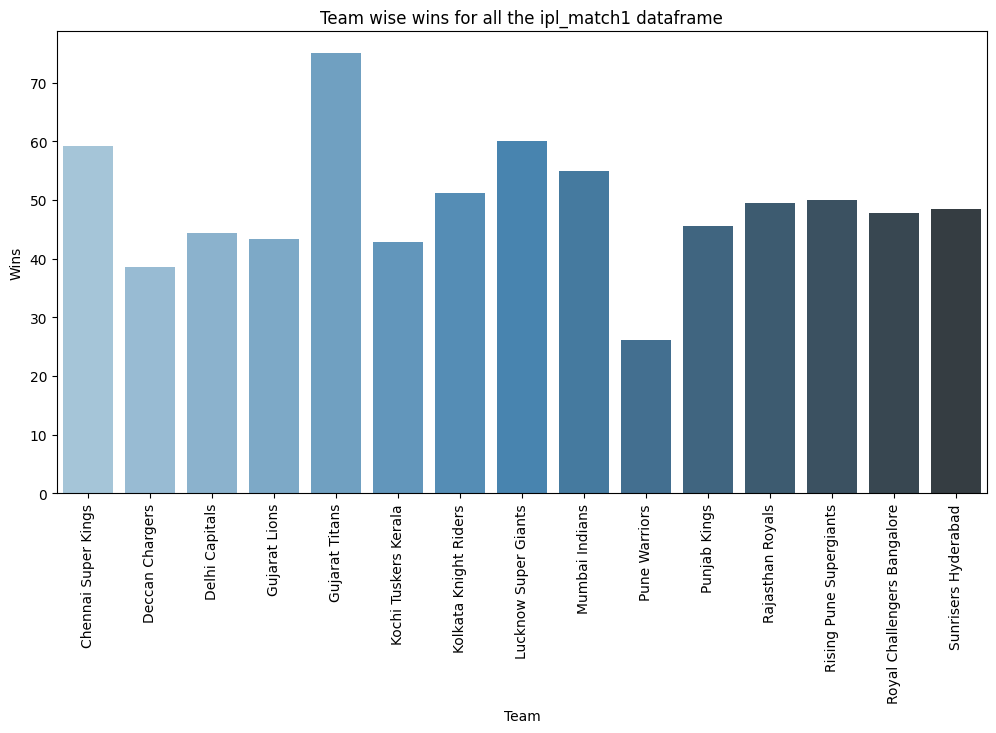

In [22]:

team_counts = ipl_match1['team1'].value_counts() + ipl_match1['team2'].value_counts()

# Calculate the count of times each team appears in the winner column
winner_counts = ipl_match1['winner'].value_counts()

# Calculate the winning percentage of each team
winning_percentages = winner_counts / team_counts * 100
print(winning_percentages)
# Create bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=team_counts.index, y=winning_percentages.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Wins')
plt.title('Team wise wins for all the ipl_match1 dataframe')
plt.show()

#### Distributon of players

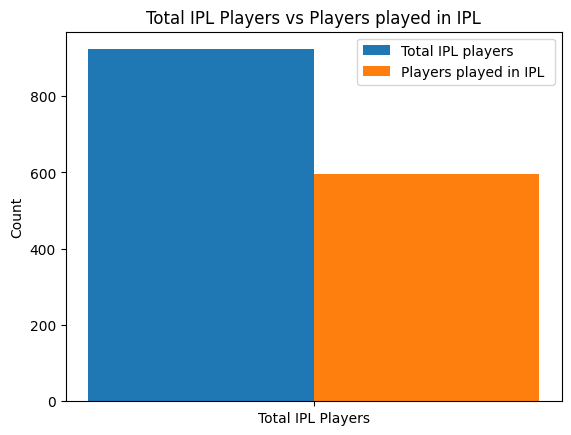

In [23]:
X = ['Total IPL Players']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, len(Total_IPL_players), 0.4, label = 'Total IPL players')
plt.bar(X_axis + 0.2, len(players_list), 0.4, label = 'Players played in IPL ')
  
plt.xticks(X_axis, X)
plt.ylabel("Count")
plt.title('Total IPL Players vs Players played in IPL')
plt.legend()
plt.show()

##### IPL Played players based on their roles

Text(0.5, 1.0, 'Count of IPL Played players ')

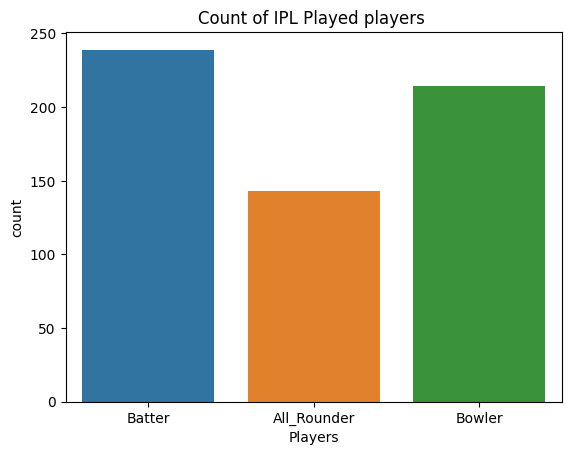

In [24]:
sns.countplot(x = players_df['Players'])
plt.title ('Count of IPL Played players ')

#### Performance of Batters

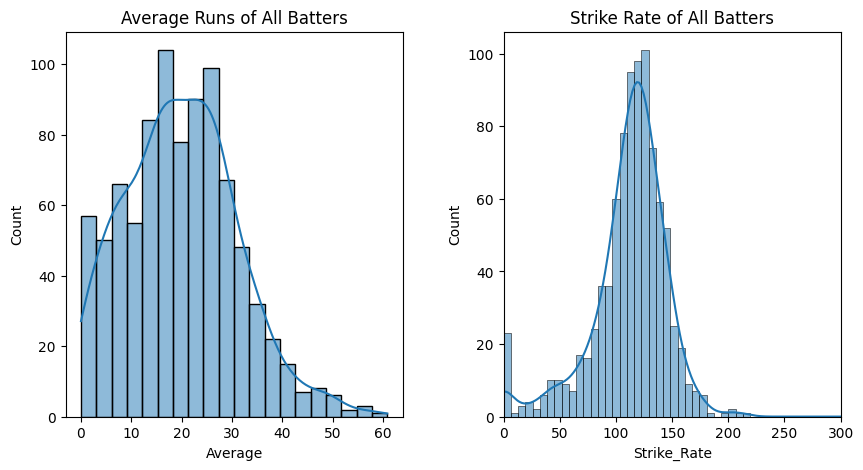

In [25]:
Batters1 = ipl_ball1['striker']
Batters1 = Batters1.append(ipl_ball1['non_striker']).unique()
All_Batters1 = players_df.loc[(players_df['Players']== 'Batter')]
Batters_list1 = set(list(All_Batters1['Names'])) & set(Batters1)
Batt_df = Batt(ipl_ball1,Batters_list1)
#sns.histplot(Batt_df['Strike_Rate'], kde=True) # Average

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(Batt_df['Average'], kde=True, ax=axs[0])
axs[0].set_title('Average Runs of All Batters')
sns.histplot(Batt_df['Strike_Rate'], kde=True, ax=axs[1])
plt.xlim(0,300)
axs[1].set_title('Strike Rate of All Batters')
plt.subplots_adjust(wspace=0.3)
plt.show()

#### Performance of Bowlers

Text(0.5, 1.0, 'Economy of All Bowlers')

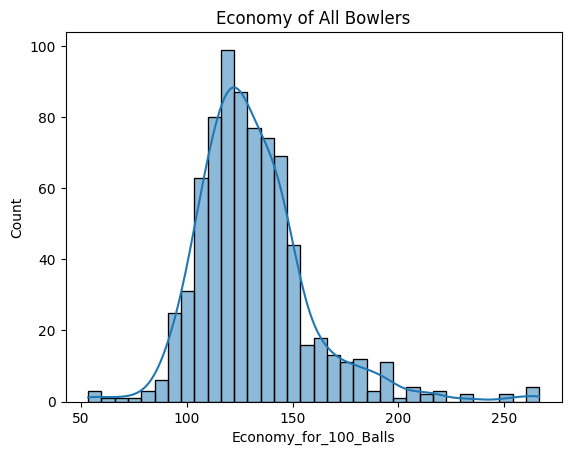

In [26]:
Bowlers1 = ipl_ball1['bowler'].unique()
All_Bowlers1 = players_df.loc[(players_df['Players']== 'Bowler')]
Bowlers_list1 = set(list(All_Bowlers1['Names'])) & set(Bowlers1)
Bowlers_df1 = Bowl(ipl_ball1,Bowlers_list1)
sns.histplot(Bowlers_df1['Economy_for_100_Balls'], kde=True)
plt.title('Economy of All Bowlers')

#### Performance of All Rounders

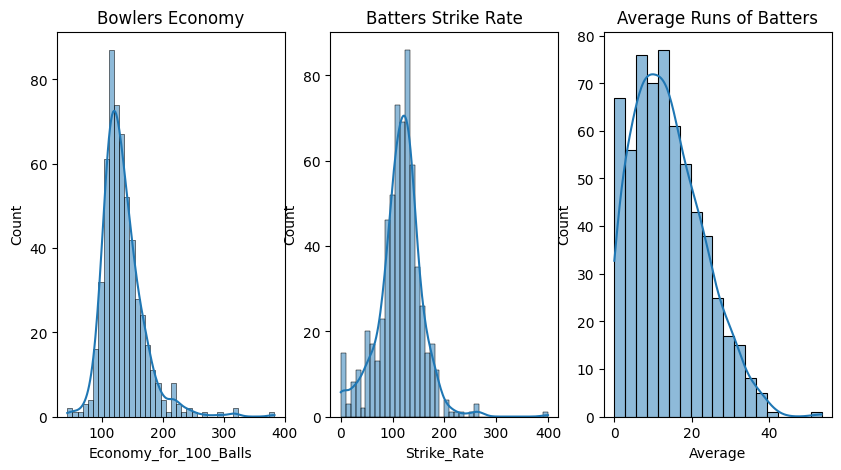

In [27]:
Rounders1 = ipl_ball1['striker']
Rounders1.append(ipl_ball1['non_striker'])
Rounders1.append(ipl_ball1['bowler']).unique()
All_Rounders1 = players_df.loc[(players_df['Players']== 'All_Rounder')]
All_Rounders_list1 = set(list(All_Rounders1['Names'])) & set(Rounders1)
All_Rounders_Batters_Stats1 = Batt(ipl_ball1,All_Rounders_list1)
All_Rounders_Bowlers_Stats1 = Bowl(ipl_ball1,All_Rounders_list1)

    
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
sns.histplot(All_Rounders_Bowlers_Stats1['Economy_for_100_Balls'], kde=True, ax=axs[0])
axs[0].set_title('Bowlers Economy')
sns.histplot(All_Rounders_Batters_Stats1['Strike_Rate'], kde=True, ax=axs[1])
axs[1].set_title('Batters Strike Rate')
sns.histplot(All_Rounders_Batters_Stats1['Average'], kde=True, ax=axs[2])
axs[2].set_title('Average Runs of Batters')
plt.subplots_adjust(wspace=0.2)
plt.show()

#### Performance of players or Teams according to the years


Available seasons are ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2021' '2022']

 Enter the season from available seasons list --- 2019

 
 Available venues are ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan S

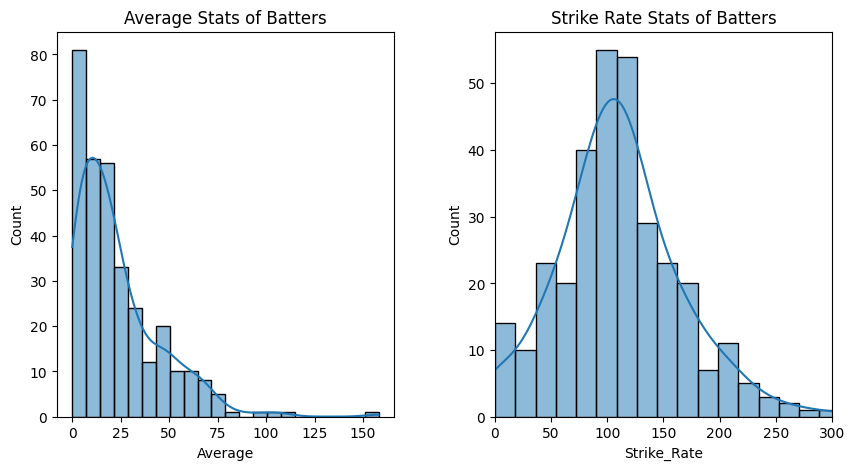

In [28]:
# Batters
Batting_S, Bowling_S, Team_S = Cricket()

In [41]:
Batting_S

,striker,season,runs_off_bat,Strike_Rate,Average
0,A Mukund,2007/08,0,0.000000,0.000000
1,AB de Villiers,2007/08,26,118.181818,26.000000
2,AB de Villiers,2011,104,142.465753,34.666667
3,AB de Villiers,2012,4,133.333333,4.000000
4,AB de Villiers,2013,64,193.939394,64.000000
...,...,...,...,...,...
226,WP Saha,2011,46,131.428571,46.000000
227,WP Saha,2012,6,42.857143,6.000000
228,WP Saha,2013,57,135.714286,28.500000
229,WP Saha,2015,15,65.217391,15.000000


In [42]:
Bowling_S

0

In [43]:
Team_S

0

Available seasons are ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2021' '2022']

 Enter the season from available seasons list --- 2019

 
 Available venues are ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan S

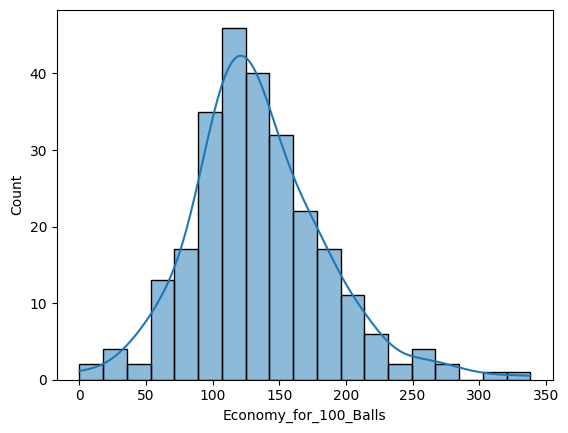

In [29]:
# Bowlers
Batting_S, Bowling_S, Team_S = Cricket()

In [30]:
Batting_S

0

In [31]:
Bowling_S 

,season,bowler,runs_off_bat,ball,Economy_for_100_Balls,Averag e_Wickets
0,2007/08,A Kumble,164,120,136.666667,0.4
1,2007/08,A Nehra,21,18,116.666667,1.0
2,2007/08,AA Noffke,35,25,140.000000,1.0
3,2007/08,AB Agarkar,21,28,75.000000,3.0
4,2007/08,AB Dinda,7,20,35.000000,2.0
...,...,...,...,...,...,...
252,2017,TG Southee,21,14,150.000000,0.0
253,2017,TS Mills,35,24,145.833333,0.0
254,2017,UT Yadav,75,66,113.636364,2.0
255,2017,VR Aaron,26,26,100.000000,0.0


In [32]:
Team_S

0

Available seasons are ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2021' '2022']

 Enter the season from available seasons list --- 2019

 
 Available venues are ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan S

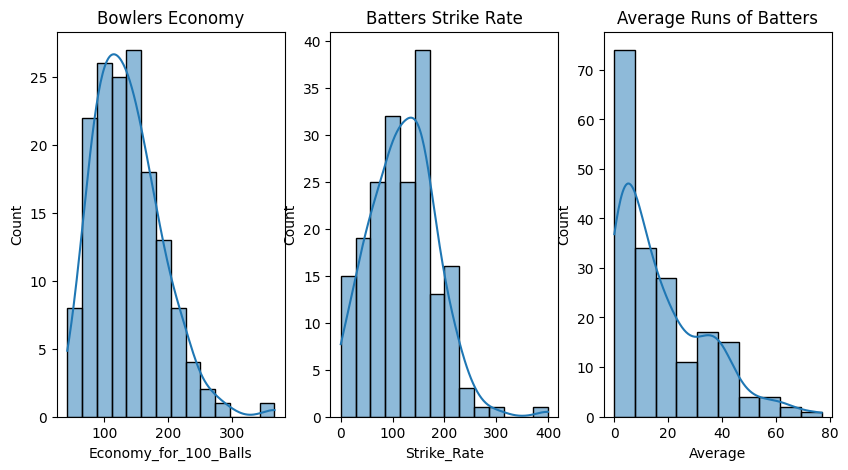

In [33]:
# All Rounders
Batting_S, Bowling_S, Team_S = Cricket()

In [34]:
Batting_S

,striker,season,runs_off_bat,Strike_Rate,Average
0,A Ashish Reddy,2013,3,75.000000,3.0
1,A Ashish Reddy,2016,32,177.777778,32.0
2,A Chandila,2013,4,66.666667,4.0
3,A Symonds,2009/10,53,212.000000,53.0
4,AA Jhunjhunwala,2009/10,5,71.428571,5.0
...,...,...,...,...,...
185,Yuvraj Singh,2013,16,114.285714,16.0
186,Yuvraj Singh,2014,193,154.400000,38.6
187,Yuvraj Singh,2015,11,157.142857,11.0
188,Yuvraj Singh,2016,38,158.333333,38.0


In [35]:
Bowling_S

,season,bowler,runs_off_bat,ball,Economy_for_100_Balls,Averag e_Wickets
0,2007/08,B Akhil,72,63,114.285714,0.333333
1,2007/08,DR Smith,21,25,84.000000,3.000000
2,2007/08,IK Pathan,12,21,57.142857,3.000000
3,2007/08,JA Morkel,35,27,129.629630,1.000000
4,2007/08,JH Kallis,155,109,142.201835,0.333333
...,...,...,...,...,...,...
150,2017,RA Jadeja,28,24,116.666667,2.000000
151,2017,SP Narine,70,72,97.222222,0.666667
152,2017,SR Watson,84,51,164.705882,1.000000
153,2017,STR Binny,13,13,100.000000,1.000000


In [36]:
Team_S

0

Available seasons are ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2021' '2022']

 Enter the season from available seasons list --- 2019

 
 Available venues are ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan S

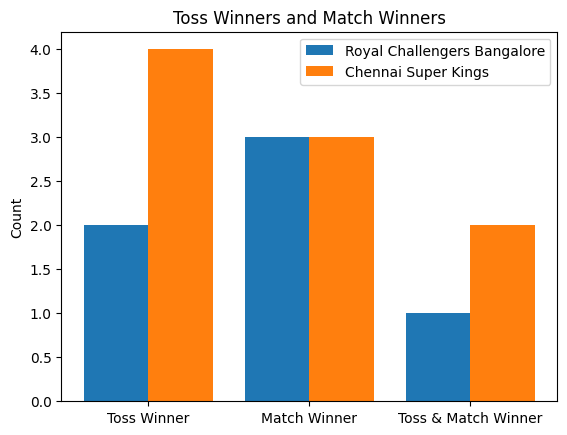


 Team performance are stored in dataframe ---  Team_Stats


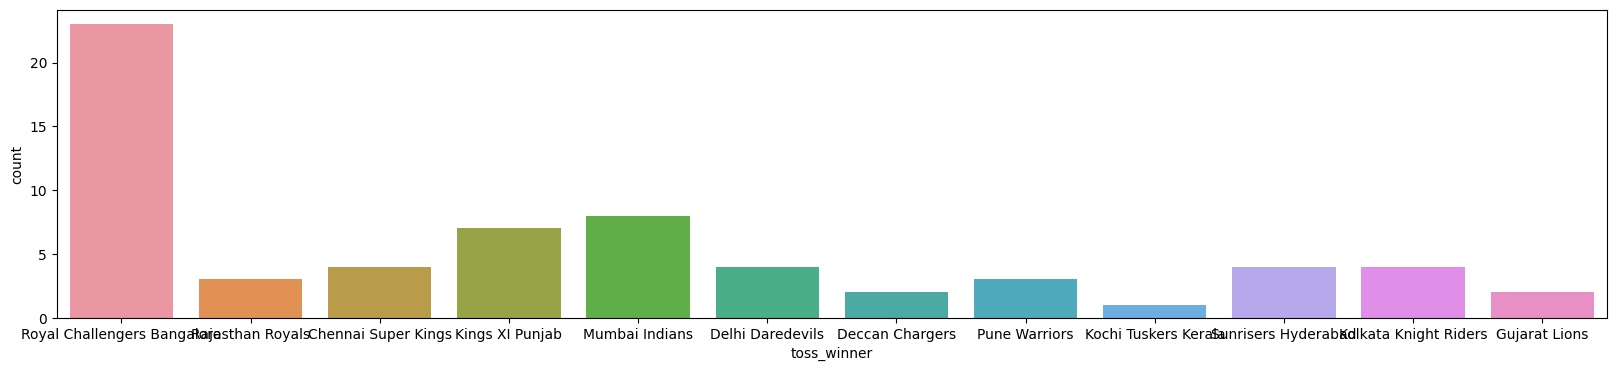

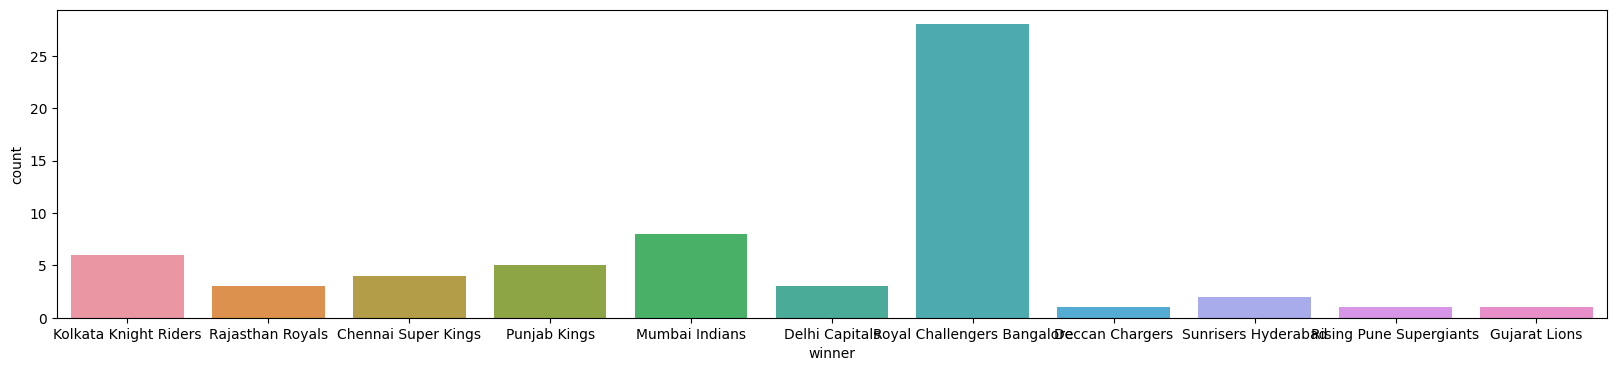

In [37]:
# Teams - Chennai Super Kings vs Royal Challengers Bangalore @ M Chinnaswamy Stadium --- Bangalore Venue 
Batting_S, Bowling_S, Team_S = Cricket()

In [38]:
Batting_S

0

In [39]:
Bowling_S

0

In [40]:
Team_S

,season,toss_winner,toss_decision,result_type,winner
14,2007/08,Chennai Super Kings,bat,defended,Chennai Super Kings
132,2009/10,Chennai Super Kings,field,defended,Royal Challengers Bangalore
242,2011,Royal Challengers Bangalore,field,chased,Royal Challengers Bangalore
392,2013,Chennai Super Kings,field,defended,Royal Challengers Bangalore
450,2014,Chennai Super Kings,field,chased,Chennai Super Kings
478,2015,Royal Challengers Bangalore,field,defended,Chennai Super Kings


Available seasons are ['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2019' '2018' '2021' '2022']

 Enter the season from available seasons list --- 2019

 
 Available venues are ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Eden Gardens' 'Wankhede Stadium'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Brabourne Stadium, Mumbai'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium' 'Maharashtra Cricket Association Stadium'
 'Shaheed Veer Narayan S

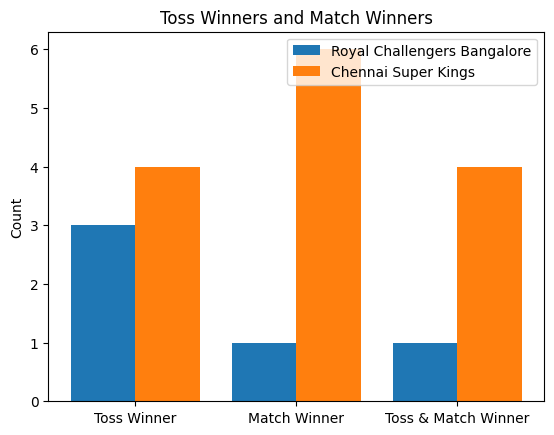


 Team performance are stored in dataframe ---  Team_Stats


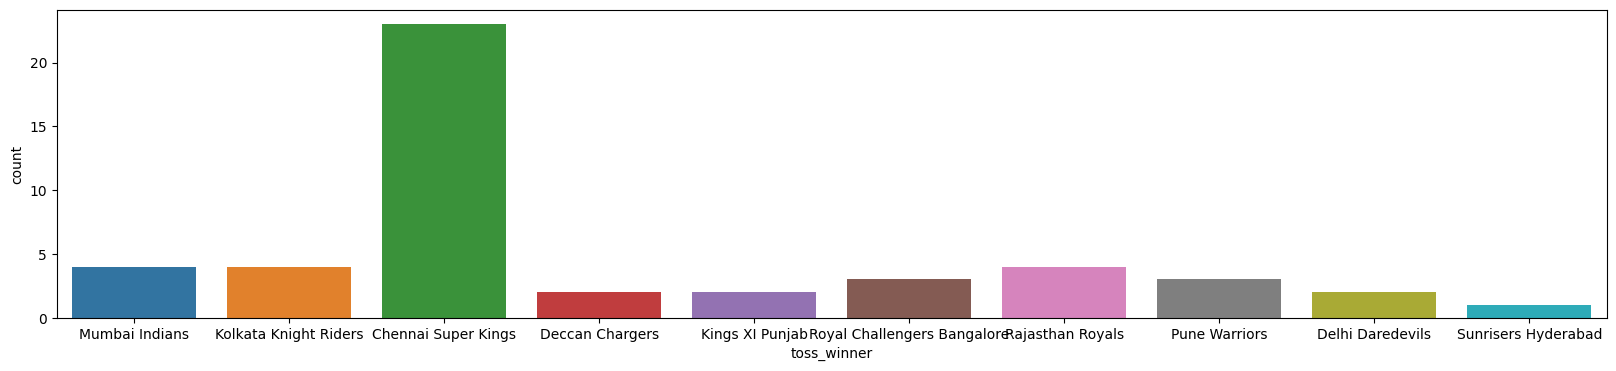

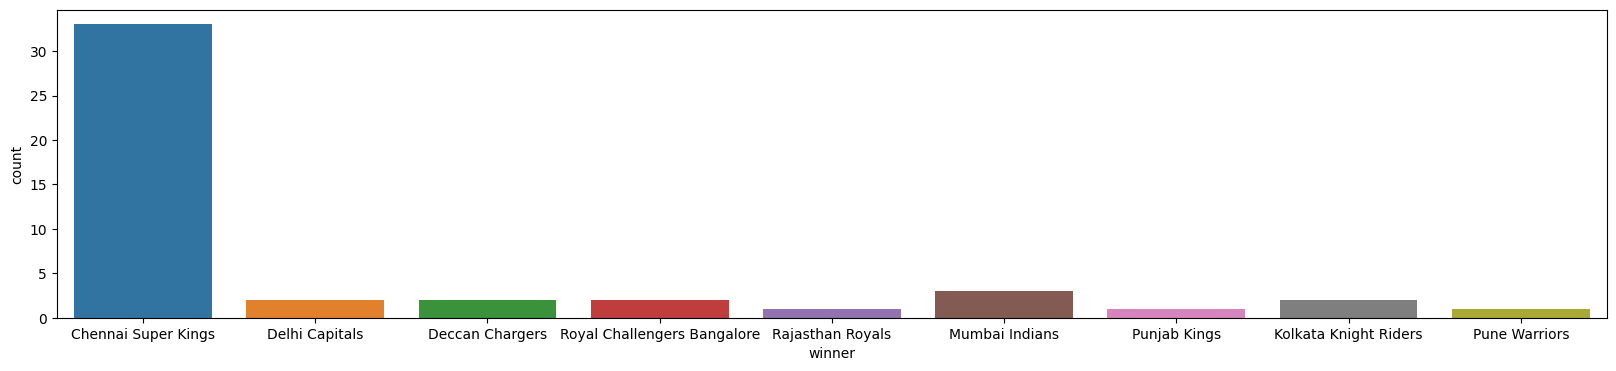

In [41]:
# Teams - Chennai Super Kings vs Royal Challengers Bangalore @ MA Chidambaram Stadium, Chepauk -- Chennai Venue 
Batting_S, Bowling_S, Team_S = Cricket()

In [42]:
Batting_S

0

In [43]:
Bowling_S

0

In [44]:
Team_S

,season,toss_winner,toss_decision,result_type,winner
47,2007/08,Royal Challengers Bangalore,bat,defended,Royal Challengers Bangalore
142,2009/10,Royal Challengers Bangalore,bat,chased,Chennai Super Kings
188,2011,Chennai Super Kings,bat,defended,Chennai Super Kings
247,2011,Chennai Super Kings,bat,defended,Chennai Super Kings
260,2012,Royal Challengers Bangalore,bat,chased,Chennai Super Kings
336,2013,Chennai Super Kings,field,chased,Chennai Super Kings
494,2015,Chennai Super Kings,bat,defended,Chennai Super Kings


In [ ]:
# Model to calculate Winning chances of teams based on the ground 